In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb  
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split  #分割数据集
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error   #模型评价
import warnings
warnings.filterwarnings("ignore")

In [13]:
df=pd.read_csv('ts - 副本.csv')
df=df.drop(['Unnamed: 0'],axis=1)
X=df.iloc[:,0:49]
y=df.iloc[:,49]
y
X=X.values
y=y.values.ravel()

In [3]:
df

,ex2PEOE_VSA9,R,ex2BCUT2D_CHGHI,pieceSMR_VSA6,pieceFpDensityMorgan2,preBCUT2D_MWHI,pieceBCUT2D_MRLOW,polyol_MW,piecePEOE_VSA10,pieceVSA_EState6,...,ex2PEOE_VSA7,ex2MolLogP,pieceNumAliphaticHeterocycles,ex1PEOE_VSA9,pieceVSA_EState5,pieceVSA_EState2,ex2MaxPartialCharge,pieceBertzCT,ex2TPSA,lg_ts
0,37.698299,1.050,2.667007,972.155354,0.123596,16.563122,-0.145765,1000,18.814815,2.269624,...,0.000000,-1.7204,3,0.000000,8.144053,230.965768,0.236148,12317.47579,87.07,1.747412
1,0.000000,1.000,1.768325,786.403937,0.052248,16.625091,-0.148963,2000,0.000000,112.324035,...,12.841643,-0.2488,0,0.000000,-51.980591,1426.744590,0.043137,29187.86335,40.46,1.724276
2,0.000000,1.000,1.768325,654.266298,0.062958,16.599206,-0.148228,830,66.068820,117.262488,...,12.841643,-0.2488,0,0.000000,-19.949761,937.240305,0.043137,22986.52704,40.46,1.713491
3,0.000000,1.000,1.768325,686.334458,0.157282,16.628643,-0.116354,1000,63.554242,-2.156748,...,12.841643,-0.2488,0,0.000000,-0.058639,230.664468,0.043137,14626.88738,40.46,1.695832
4,13.213764,1.050,2.306420,2047.028299,0.076670,16.581111,-0.152533,1000,37.381444,119.826637,...,6.923737,-0.9381,0,18.752689,-1.475715,246.146879,0.313554,22717.08821,77.76,1.692847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.000000,1.000,1.841818,1956.642893,0.039911,16.581462,0.075251,2000,0.000000,2.810960,...,12.841643,0.5314,0,0.000000,10.963309,200.822187,0.043052,17576.19289,40.46,0.562293
250,13.213764,0.500,1.947280,2052.282962,0.065431,16.581111,0.075255,2000,37.926552,138.575552,...,24.265468,0.4288,0,21.420039,1.102788,200.343715,0.119189,23093.55126,58.92,0.531479
251,0.000000,1.004,1.841818,1281.920084,0.053592,16.669523,-0.118150,2000,63.554242,119.782850,...,12.841643,0.5314,0,0.000000,0.000000,203.236029,0.043052,25303.04925,40.46,0.527630
252,26.303277,1.000,1.887747,991.789624,0.094796,16.564145,0.075756,1000,26.427528,18.282291,...,11.126903,0.5090,0,26.303277,10.796183,218.587844,0.062643,12265.77756,65.18,0.514548


MSE_train: 0.0009666096818606092 
 MSE_test 0.01960644214984291
MAE_train: 0.008927988839888247 
 MAE_test 0.10021675113469623
R^2_train: 0.9883915382741595 
 R^2_test1: 0.8028459547230617


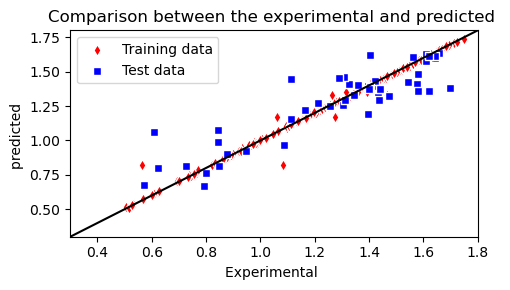

In [4]:
import xgboost as xgb
X_train,X_test= train_test_split(X, test_size=0.2,random_state = 2)
y_train,y_test = train_test_split(y, test_size=0.2,random_state = 2)

#print('X_train shape',X_train.shape,'X_test. shape',X_test.shape)
#print('y_train shape',y_train.shape,'y_test shape',y_test.shape)

from sklearn.preprocessing  import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
model=xgb.XGBRegressor(random_state=0,n_estimators=91,max_depth =5)
model.fit(X_train_std,y_train)
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)
score=r2_score(y_test,y_test_pred)
y_train_pred = model.predict(X_train_std) #预测训练集
y_test_pred= model.predict(X_test_std)   #预测测试集
MSE_train = mean_squared_error(y_train,y_train_pred) 
MSE_test = mean_squared_error(y_test,y_test_pred)
MAE_train = mean_absolute_error(y_train,y_train_pred) 
MAE_test= mean_absolute_error(y_test,y_test_pred)
print('MSE_train:',MSE_train,'\n','MSE_test',MSE_test) 
print('MAE_train:',MAE_train,'\n','MAE_test',MAE_test)
print("R^2_train:",r2_score(y_train,y_train_pred),'\n',"R^2_test1:",r2_score(y_test,y_test_pred))
#真实值预测值平面散点图
plt.figure(figsize=(5,3)) # 指定图片的尺寸
plt.scatter(y_train,y_train_pred,color='red',marker='d',edgecolor='white',label ='Training data') #残差散点图，指定散点的颜色，标记(o为圆圈s为方块)，标签等设定
plt.scatter(y_test,y_test_pred,color='blue',marker='s',edgecolor='white',label ='Test data')
plt.ylabel('predicted ')
plt.xlabel('Experimental ')
plt.title('Comparison between the experimental and predicted ')
plt.legend(loc = 'upper left') #图例位置
plt.plot([0.3, 1.8], [0.3,1.8],c='black')
plt.xlim([0.3,1.8]) # 设定x轴范围
plt.ylim(0.3,1.8)
plt.tight_layout() #自动调整子图参数，使之填充整个图像区域，可用于检查坐标轴标签、刻度标签以及标题的部分
#plt.savefig("C:\Users\Administrator\Desktop\test\ILCO2_SVM_pred.png")     #图片保存
plt.show()

In [6]:
test=pd.read_csv('460ts.csv')
XTEST=test.iloc[:,0:49]
XTEST=XTEST.values
#sc = StandardScaler()
#X = sc.fit_transform(X)
XTEST = sc.transform(XTEST)
ypre=model.predict(XTEST)
test['prexgb']=pd.DataFrame(ypre)
#ypre=pd.DataFrame(ypre)
test.to_csv('460ts.csv')

MSE_train: 0.001037423183696138 
 MSE_test 0.016946578387708647
MAE_train: 0.012656747184182582 
 MAE_test 0.0958265002290793
R^2_train: 0.9875411062526758 
 R^2_test1: 0.8295924136972366


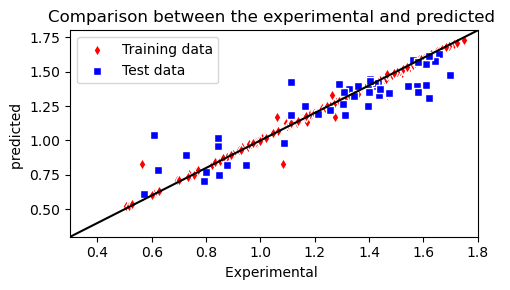

In [19]:
X_train,X_test= train_test_split(X, test_size=0.2,random_state =2)
y_train,y_test = train_test_split(y, test_size=0.2,random_state = 2)

#print('X_train shape',X_train.shape,'X_test. shape',X_test.shape)
#print('y_train shape',y_train.shape,'y_test shape',y_test.shape)

from sklearn.preprocessing  import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=91,max_depth=7,random_state=0)
model.fit(X_train_std, y_train)
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)
score=r2_score(y_test,y_test_pred)
#y_train_pred = model.predict(X_train_std) #预测训练集
#y_test_pred= model.predict(X_test_std)   #预测测试集
MSE_train = mean_squared_error(y_train,y_train_pred) 
MSE_test = mean_squared_error(y_test,y_test_pred)
MAE_train = mean_absolute_error(y_train,y_train_pred) 
MAE_test= mean_absolute_error(y_test,y_test_pred)
print('MSE_train:',MSE_train,'\n','MSE_test',MSE_test) 
print('MAE_train:',MAE_train,'\n','MAE_test',MAE_test)
print("R^2_train:",r2_score(y_train,y_train_pred),'\n',"R^2_test1:",r2_score(y_test,y_test_pred))
#真实值预测值平面散点图
plt.figure(figsize=(5,3)) # 指定图片的尺寸
plt.scatter(y_train,y_train_pred,color='red',marker='d',edgecolor='white',label ='Training data') #残差散点图，指定散点的颜色，标记(o为圆圈s为方块)，标签等设定
plt.scatter(y_test,y_test_pred,color='blue',marker='s',edgecolor='white',label ='Test data')
plt.ylabel('predicted ')
plt.xlabel('Experimental ')
plt.title('Comparison between the experimental and predicted ')
plt.legend(loc = 'upper left') #图例位置
plt.plot([0.3, 1.8], [0.3,1.8],c='black')
plt.xlim([0.3,1.8]) # 设定x轴范围
plt.ylim(0.3,1.8)
plt.tight_layout() #自动调整子图参数，使之填充整个图像区域，可用于检查坐标轴标签、刻度标签以及标题的部分
#plt.savefig("C:\Users\Administrator\Desktop\test\ILCO2_SVM_pred.png")     #图片保存
plt.show()

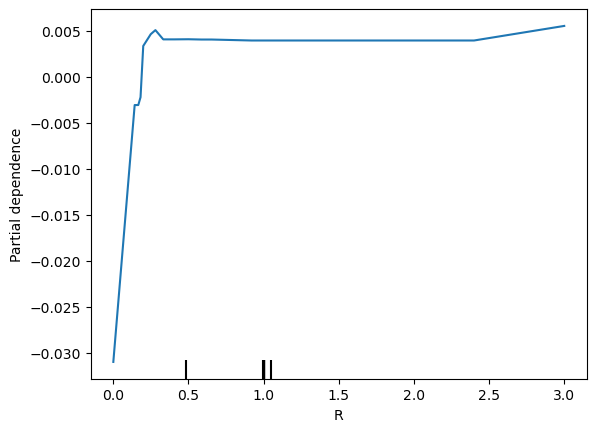

In [27]:
from sklearn.inspection import PartialDependenceDisplay
X=df.iloc[:,0:49]
features = ['R']  # 替换为你要绘制的特征
PartialDependenceDisplay.from_estimator(model, X, features, kind='average')
plt.show()
#这里都是通过sklearn的PartialDependenceDisplay进行实现，除了这个实现方法，还可以通过shap、pdpbox实现，X轴：表示选择研究的特征的取值范围，Y轴表示模型的预测结果

In [8]:
test=pd.read_csv('460ts.csv')
XTEST=test.iloc[:,0:49]
XTEST=XTEST.values
#sc = StandardScaler()
#X = sc.fit_transform(X)
XTEST = sc.transform(XTEST)
ypre=model.predict(XTEST)
test['pregbr']=pd.DataFrame(ypre)
#ypre=pd.DataFrame(ypre)
test.to_csv('460ts.csv')

In [13]:
test=pd.read_csv('tstest.csv')
XTEST=test.iloc[:,0:49]
XTEST=XTEST.values
#sc = StandardScaler()
#X = sc.fit_transform(X)
XTEST = sc.transform(XTEST)
ypre=model.predict(XTEST)
test['pregbr']=pd.DataFrame(ypre)
#ypre=pd.DataFrame(ypre)
test.to_csv('tstest.csv')

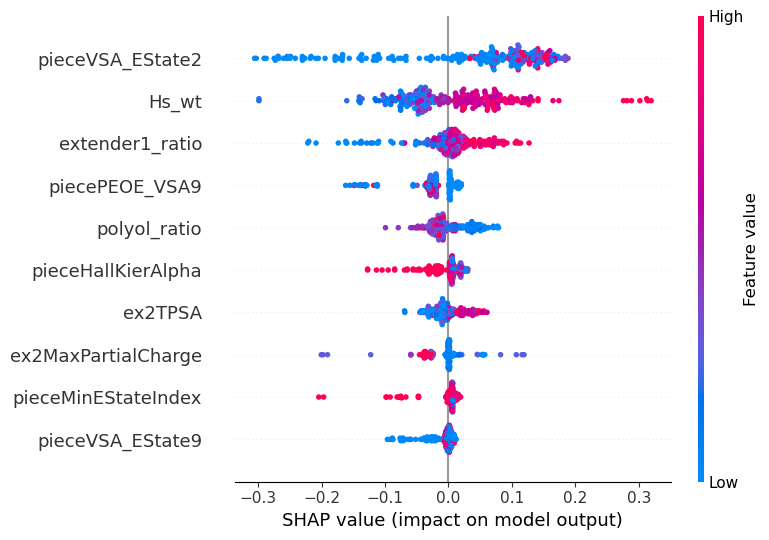

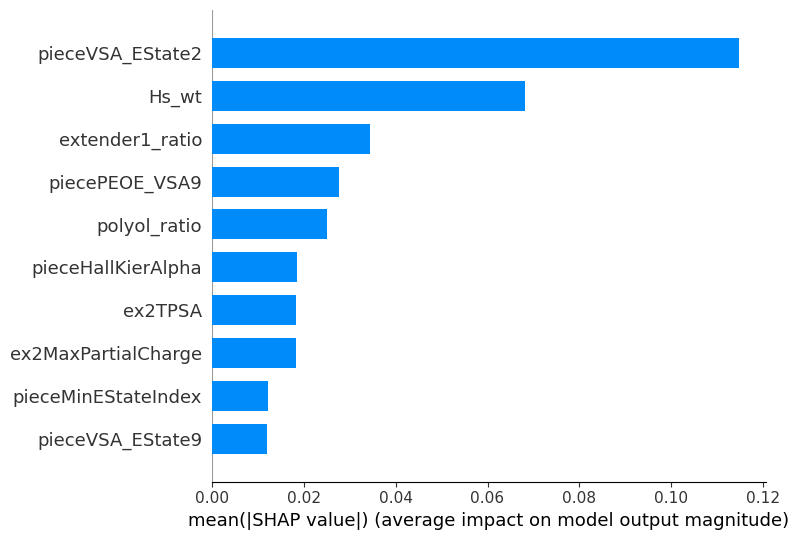

In [6]:
sc = StandardScaler()
X= sc.fit_transform(X)
X1=df.iloc[:,0:49]
X=pd.DataFrame(X,columns=X1.columns)
import shap
import json 
shap.initjs()
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.summary_plot(shap_values, X,max_display=10)
shap.summary_plot(shap_values, X,max_display=10, 
                  plot_type="bar")


TypeError: partial_dependence() missing 1 required positional argument: 'feature_index'

MSE_train: 0.00201170558990017 
 MSE_test 0.09572753487325716
MAE_train: 0.01588073874590994 
 MAE_test 0.18239608458695147
R^2_train: 0.9755584906121324 
 R^2_test1: 0.08556603117470252


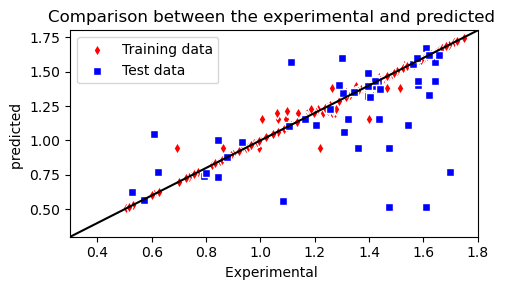

In [6]:
#DT
X_train,X_test= train_test_split(X, test_size=0.2,random_state = 2)
y_train,y_test = train_test_split(y, test_size=0.2,random_state = 2)
from sklearn.preprocessing  import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=15,random_state=9)
model.fit(X_train_std,y_train)
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)
score=r2_score(y_test,y_test_pred)
y_train_pred = model.predict(X_train_std) #预测训练集
y_test_pred= model.predict(X_test_std)   #预测测试集
MSE_train = mean_squared_error(y_train,y_train_pred) 
MSE_test = mean_squared_error(y_test,y_test_pred)
MAE_train = mean_absolute_error(y_train,y_train_pred) 
MAE_test= mean_absolute_error(y_test,y_test_pred)
print('MSE_train:',MSE_train,'\n','MSE_test',MSE_test) 
print('MAE_train:',MAE_train,'\n','MAE_test',MAE_test)
print("R^2_train:",r2_score(y_train,y_train_pred),'\n',"R^2_test1:",r2_score(y_test,y_test_pred))
plt.figure(figsize=(5,3)) # 指定图片的尺寸
plt.scatter(y_train,y_train_pred,color='red',marker='d',edgecolor='white',label ='Training data') #残差散点图，指定散点的颜色，标记(o为圆圈s为方块)，标签等设定
plt.scatter(y_test,y_test_pred,color='blue',marker='s',edgecolor='white',label ='Test data')
plt.ylabel('predicted ')
plt.xlabel('Experimental ')
plt.title('Comparison between the experimental and predicted ')
plt.legend(loc = 'upper left') #图例位置
plt.plot([0.3, 1.8], [0.3,1.8],c='black')
plt.xlim([0.3,1.8]) # 设定x轴范围
plt.ylim(0.3,1.8)
plt.tight_layout() #自动调整子图参数，使之填充整个图像区域，可用于检查坐标轴标签、刻度标签以及标题的部分
#plt.savefig("C:\Users\Administrator\Desktop\test\ILCO2_SVM_pred.png")     #图片保存
plt.show()

MSE_train: 0.012792329249333004 
 MSE_test 0.05254173079392637
MAE_train: 0.08308663852354832 
 MAE_test 0.17602655056094982
R^2_train: 0.8445777369163738 
 R^2_test1: 0.49809693227290286


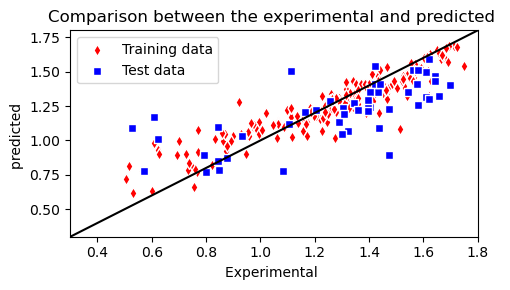

In [7]:
X_train,X_test= train_test_split(X, test_size=0.2,random_state = 2)
y_train,y_test = train_test_split(y, test_size=0.2,random_state = 2)

#print('X_train shape',X_train.shape,'X_test. shape',X_test.shape)
#print('y_train shape',y_train.shape,'y_test shape',y_test.shape)

from sklearn.preprocessing  import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_features=3,n_estimators=11,max_depth=14,random_state=0,n_jobs=-1)
model.fit(X_train_std,y_train)
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)
score=r2_score(y_test,y_test_pred)
y_train_pred = model.predict(X_train_std) #预测训练集
y_test_pred= model.predict(X_test_std)   #预测测试集
MSE_train = mean_squared_error(y_train,y_train_pred) 
MSE_test = mean_squared_error(y_test,y_test_pred)
MAE_train = mean_absolute_error(y_train,y_train_pred) 
MAE_test= mean_absolute_error(y_test,y_test_pred)
print('MSE_train:',MSE_train,'\n','MSE_test',MSE_test) 
print('MAE_train:',MAE_train,'\n','MAE_test',MAE_test)
print("R^2_train:",r2_score(y_train,y_train_pred),'\n',"R^2_test1:",r2_score(y_test,y_test_pred))
#真实值预测值平面散点图
plt.figure(figsize=(5,3)) # 指定图片的尺寸
plt.scatter(y_train,y_train_pred,color='red',marker='d',edgecolor='white',label ='Training data') #残差散点图，指定散点的颜色，标记(o为圆圈s为方块)，标签等设定
plt.scatter(y_test,y_test_pred,color='blue',marker='s',edgecolor='white',label ='Test data')
plt.ylabel('predicted ')
plt.xlabel('Experimental ')
plt.title('Comparison between the experimental and predicted ')
plt.legend(loc = 'upper left') #图例位置
plt.plot([0.3, 1.8], [0.3,1.8],c='black')
plt.xlim([0.3,1.8]) # 设定x轴范围
plt.ylim(0.3,1.8)
plt.tight_layout() #自动调整子图参数，使之填充整个图像区域，可用于检查坐标轴标签、刻度标签以及标题的部分
#plt.savefig("C:\Users\Administrator\Desktop\test\ILCO2_SVM_pred.png")     #图片保存
plt.show()

X_train shape (203, 49) X_test. shape (51, 49)
y_train shape (203,) y_test shape (51,)
Epoch 1/758
26/26 [==============================] - 1s 5ms/step - loss: 0.2022 - val_loss: 0.1275
Epoch 2/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0951 - val_loss: 0.0966
Epoch 3/758
26/26 [==============================] - 0s 2ms/step - loss: 0.0862 - val_loss: 0.1369
Epoch 4/758
26/26 [==============================] - 0s 2ms/step - loss: 0.0761 - val_loss: 0.0866
Epoch 5/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0763 - val_loss: 0.0796
Epoch 6/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0663 - val_loss: 0.0787
Epoch 7/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0665 - val_loss: 0.0751
Epoch 8/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0744 - val_loss: 0.0681
Epoch 9/758
26/26 [==============================] - 0s 2ms/step - loss: 0.0743 - val_loss: 0.0684
Epoch 10/758
26/26 [==

26/26 [==============================] - 0s 1ms/step - loss: 0.0223 - val_loss: 0.0449
Epoch 164/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0377
Epoch 165/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0242 - val_loss: 0.0337
Epoch 166/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0355 - val_loss: 0.0565
Epoch 167/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0265 - val_loss: 0.0332
Epoch 168/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0212 - val_loss: 0.0566
Epoch 169/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0294 - val_loss: 0.0408
Epoch 170/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0275 - val_loss: 0.0367
Epoch 171/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0278 - val_loss: 0.0370
Epoch 172/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0212 - val_loss: 0.0314
Epoc

26/26 [==============================] - 0s 1ms/step - loss: 0.0145 - val_loss: 0.0253
Epoch 326/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0248 - val_loss: 0.0305
Epoch 327/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0177 - val_loss: 0.0309
Epoch 328/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0169 - val_loss: 0.0367
Epoch 329/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0153 - val_loss: 0.0279
Epoch 330/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0214 - val_loss: 0.0525
Epoch 331/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0217 - val_loss: 0.0293
Epoch 332/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0173 - val_loss: 0.0322
Epoch 333/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0191 - val_loss: 0.0465
Epoch 334/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0169 - val_loss: 0.0278
Epoc

26/26 [==============================] - 0s 1ms/step - loss: 0.0151 - val_loss: 0.0271
Epoch 488/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.0252
Epoch 489/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0135 - val_loss: 0.0313
Epoch 490/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0121 - val_loss: 0.0222
Epoch 491/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.0274
Epoch 492/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0142 - val_loss: 0.0225
Epoch 493/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0143 - val_loss: 0.0309
Epoch 494/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0136 - val_loss: 0.0254
Epoch 495/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0123 - val_loss: 0.0223
Epoch 496/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0129 - val_loss: 0.0271
Epoc

26/26 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.0281
Epoch 650/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0170 - val_loss: 0.0239
Epoch 651/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0103 - val_loss: 0.0288
Epoch 652/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0187 - val_loss: 0.0359
Epoch 653/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0110 - val_loss: 0.0241
Epoch 654/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0286
Epoch 655/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0120 - val_loss: 0.0279
Epoch 656/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0256
Epoch 657/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0333
Epoch 658/758
26/26 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0295
Epoc

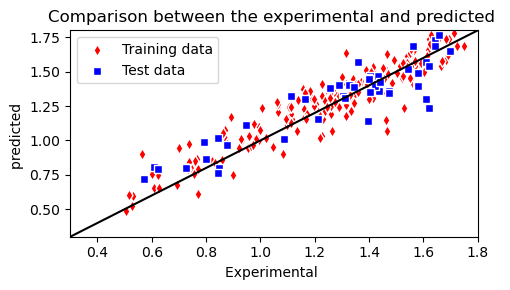

In [8]:
X_train,X_test= train_test_split(X, test_size=0.2,random_state = 2)
y_train,y_test = train_test_split(y, test_size=0.2,random_state = 2)

print('X_train shape',X_train.shape,'X_test. shape',X_test.shape)
print('y_train shape',y_train.shape,'y_test shape',y_test.shape)
from sklearn.preprocessing  import MinMaxScaler
mm1=MinMaxScaler()
X_train_std=mm1.fit_transform(X_train) #使用fit方法训练标准化变化器,然后用transform方法实行标准化.可使用fit_transform将训练和标准化同时进行，然后将标准化后的X_train用X_train_std来表示
X_test_std=mm1.transform(X_test)
#ANN
import tensorflow as tf
from keras.models import Model
from tensorflow.python.keras.layers.core import Dense,Flatten
from keras import optimizers
from keras.models import Sequential
from keras import models
from keras import layers
import tensorflow as tf#pip install tensorflow
import random
import random
random.seed(0)
np.random.seed(0)#固定随机数
tf.random.set_seed(0)

input1 = tf.keras.layers.Input(shape=[49], name="input")
XR1=tf.keras.layers.Dense(24,activation='relu')(input1)
XR2=tf.keras.layers.Dense(16,activation='relu')(XR1)
#XR3=tf.keras.layers.Dense(c,activation='relu')(XR2)
output=tf.keras.layers.Dense(1,activation='relu')(XR2)


model = tf.keras.models.Model(inputs=[input1],
                           outputs=[output])

model.compile(loss="mse", optimizer=optimizers.Adam(learning_rate=0.007))

history = model.fit(X_train_std, y_train, epochs=758,
                    validation_data=(X_test_std, y_test),batch_size=8)
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)
score_train=r2_score(y_train,y_train_pred)
score_test=r2_score(y_test,y_test_pred)
print(score_train)
print(score_test)
#真实值预测值平面散点图
plt.figure(figsize=(5,3)) # 指定图片的尺寸
plt.scatter(y_train,y_train_pred,color='red',marker='d',edgecolor='white',label ='Training data') #残差散点图，指定散点的颜色，标记(o为圆圈s为方块)，标签等设定
plt.scatter(y_test,y_test_pred,color='blue',marker='s',edgecolor='white',label ='Test data')
plt.ylabel('predicted ')
plt.xlabel('Experimental ')
plt.title('Comparison between the experimental and predicted ')
plt.legend(loc = 'upper left') #图例位置
plt.plot([0.3, 1.8], [0.3,1.8],c='black')
plt.xlim([0.3,1.8]) # 设定x轴范围
plt.ylim(0.3,1.8)
plt.tight_layout() #自动调整子图参数，使之填充整个图像区域，可用于检查坐标轴标签、刻度标签以及标题的部分
#plt.savefig("C:\Users\Administrator\Desktop\test\ILCO2_SVM_pred.png")     #图片保存
plt.show()

(0.0, 1.1)

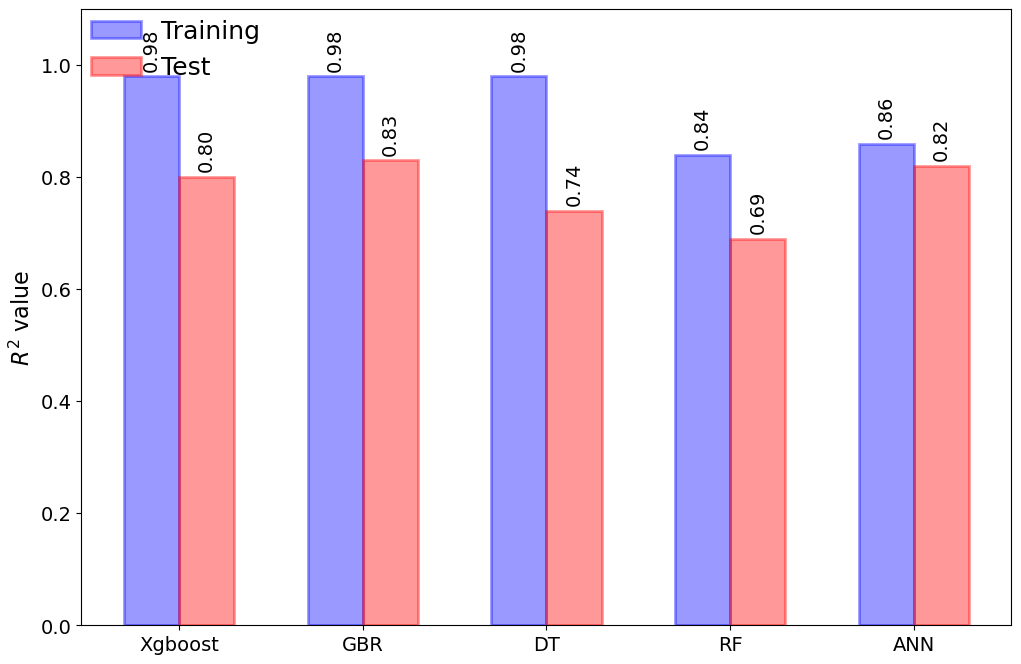

In [21]:
methods = ['Xgboost', 'GBR', 'DT', 'RF', 'ANN']
use_method = ['{}'.format(m) for m in methods ]

r2_trn = [0.98,0.98,0.98,0.84,0.86]
r2_tes = [0.80,0.83,0.74,0.69,0.82]

width =0.3
plt.figure(facecolor='white', figsize=(12,8))
ind = np.arange(len(methods))
plt.bar(ind, r2_trn, width, color='blue', alpha=0.4, edgecolor='blue', linewidth=2, label = 'Training')
plt.bar(ind+width, r2_tes, width, color='red', alpha=0.4, edgecolor='red', linewidth=2, label = 'Test')

for x,y in zip(ind, r2_trn):
    plt.text(x, y+0.01, '%.2f' % y, ha='center', va= 'bottom', rotation=90, fontsize=14)

for x,y in zip(ind, r2_tes):
    plt.text(x+ width, y+0.01, '%.2f' % y, ha='center', va= 'bottom', rotation=90, fontsize=14)

plt.xticks(ind+(width*0.5), methods, fontsize=14)
#plt.tick_params(length=0)
plt.yticks(fontsize=14)
plt.ylabel('$R^{2}$ value', fontsize=16)
#plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10)
plt.legend(bbox_to_anchor=(0, 1),loc='upper left', borderaxespad=0, fontsize=18, frameon=False)
plt.ylim(0, 1.1)
#plt.savefig(f'{PATH}/{date}_{Reaction}_ML_methods_prop{add_model}_R2_v2.png', dpi=600, bbox_inches='tight')

In [22]:
import pysisso

ModuleNotFoundError: No module named 'pysisso'